In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=10,7 # define as dimensões do gráficos a seguir

In [2]:
import datetime
import time
import os
import matplotlib.pyplot as plt
import seaborn as sns
# Set plot appearance
# See here for more options: https://matplotlib.org/users/customizing.html
%config InlineBackend.figure_format='retina'
sns.set() # Revert to matplotlib defaults
plt.rcParams['figure.figsize'] =(5, 5)
plt.rcParams['axes.labelpad'] = 10
sns.set_style("darkgrid")
# sns.set_context("poster", font_scale=1.0)
# Ignore warnings (for seaborn's kdeplot)
# import warnings
# warnings.filterwarnings('ignore')

In [3]:
df = pd.read_excel('sbgr_2012_2017_4c.xlsx')

### Análise baseada nos dados de METAR, Guarulhos, dos anos de 2012 a 2017
#### Contêm icialmente os seguintes parâmetros:

1. tmpf- temperatura do ar em farenheit
2. dwpf- ponto de orvalho em farenheit
3. relh – umidade relativa do ar
4. drct -direção do vento
5. sknt – velocidade do vento em nós
6. vsby – visibilidade em milhas


Os registros são quase sempre horários, considerando que não extrai os SPECI/TAF

#### Para esta análise, criei novos parâmetros que rementem ao  PASSADO.
Esses novos parâmetros se referem à média, soma e variação dos registros anteriores, de 4 hora atrás.

Quais sejam:
'mdrct','msknt', 'mtmpf', 'mdelta', (prefixo m= média)

'vardrct', 'vartmpf', 'varrelh', 'varsknt','vardelta', (prefixo var= variação)

'somatmpf', 'somarelh', 'somasknt', 'somadelta','somadrct'(prefixo soma=soma)


#### Dados com novos parâmetros

In [4]:
df.head()

,eco,tmpf,dwpf,relh,drct,sknt,vsby,delta,vis,mdrct,...,vardrct,vartmpf,varrelh,varsknt,vardelta,somatmpf,somarelh,somasknt,somadelta,somadrct
0,1,66.2,66.2,100.0,70,1,0.50,0.0,1,125.0,...,10,1.8,0.0,-1,0.0,270.2,400.0,8,0.0,500
1,2,66.2,66.2,100.0,0,0,1.86,0.0,0,112.5,...,40,1.8,0.0,2,0.0,268.4,400.0,8,0.0,450
2,3,66.2,66.2,100.0,0,0,1.86,0.0,0,85.0,...,160,1.8,0.0,2,0.0,266.6,400.0,5,0.0,340
3,4,66.2,66.2,100.0,360,1,1.24,0.0,0,45.0,...,110,0.0,0.0,2,0.0,264.8,400.0,3,0.0,180
4,5,66.2,66.2,100.0,0,0,1.86,0.0,0,107.5,...,-290,0.0,0.0,0,0.0,264.8,400.0,2,0.0,430


In [5]:
# Colunas do dataframe
df.columns

Index(['eco', 'tmpf', 'dwpf', 'relh', 'drct', 'sknt', 'vsby', 'delta', 'vis',
       'mdrct', 'msknt', 'mtmpf', 'mdelta', 'vardrct', 'vartmpf', 'varrelh',
       'varsknt', 'vardelta', 'somatmpf', 'somarelh', 'somasknt', 'somadelta',
       'somadrct'],
      dtype='object')

Quantos casos de baixa visibilidade no decorre de 2012 a 2017? (647)

In [6]:
df['vis'].value_counts()

0    55272
1      647
Name: vis, dtype: int64

Separei os dados em dois dataframes, um para os casos de baixa visibilidade e outro para os  de céu claro.

In [7]:
nev=df[df['vis'] == 1]
claro=df[df['vis'] == 0]

Comparando as variações de temperatura e delta, podemos observar que os nevoeiros só ocorreram após PEQUENAS variações positivas de delta.

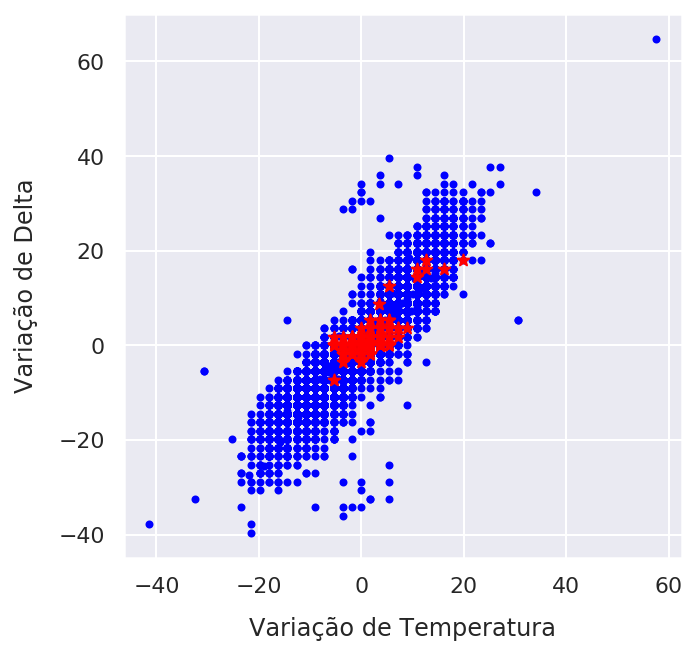

In [8]:
plt.xlabel('Variação de Temperatura')
plt.ylabel('Variação de Delta')
plt.scatter(claro.vartmpf,claro.vardelta,color='blue',marker='.')
plt.scatter(nev.vartmpf,nev.vardelta,color='red',marker='*')

Na maior parte dos casos a baixa visibilidade está relacionada a temperaturas médias abaixo de 70F (21,1Celsius) 

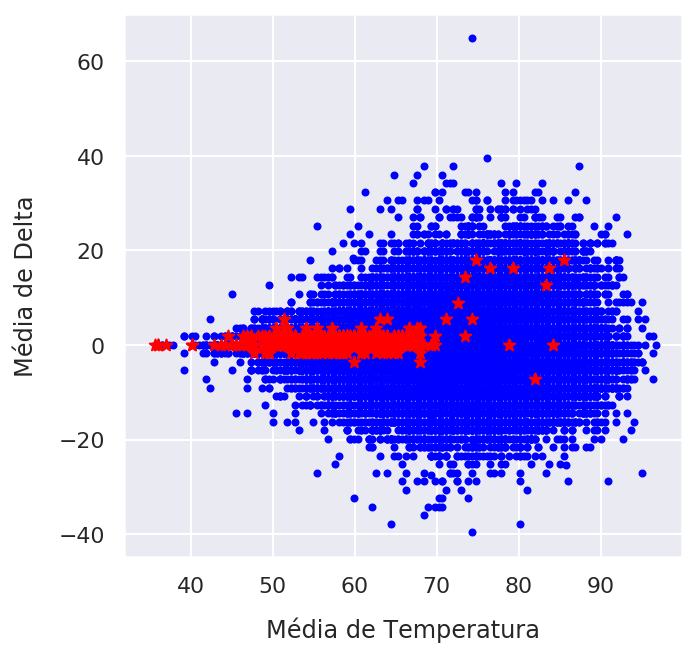

In [9]:
plt.xlabel('Média de Temperatura')
plt.ylabel('Média de Delta')
plt.scatter(claro.mtmpf,claro.vardelta,color='blue',marker='.')
plt.scatter(nev.mtmpf,nev.vardelta,color='red',marker='*')

A variação da direção do vento ocorre centrada e majoritariamente no intervalo de -100 a 100 dentro de um intervalo maior de -300 a 300.

Já a variação da velocidade do vento ocorre também centrada nas menores variações entre -10 e 10 dentro de um intervalo médio de -15 a 15.

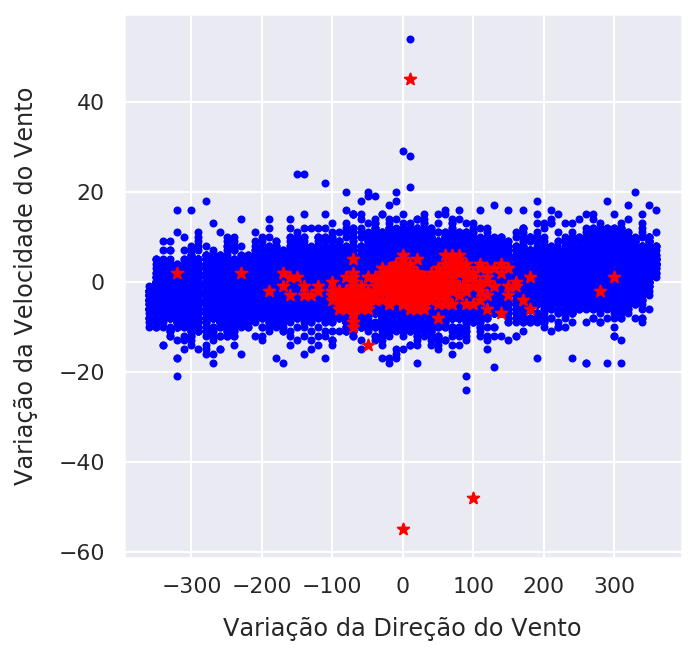

In [10]:
plt.xlabel('Variação da Direção do Vento')
plt.ylabel('Variação da Velocidade do Vento')
plt.scatter(claro.vardrct,claro.varsknt,color='blue',marker='.')
plt.scatter(nev.vardrct,nev.varsknt,color='red',marker='*')

#### Variação da Umidade X Variação da Temperatura

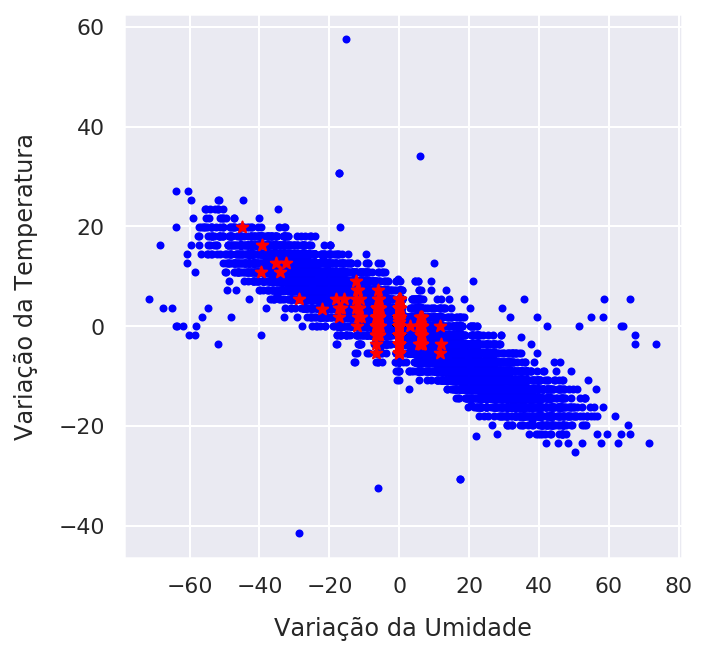

In [11]:
plt.xlabel('Variação da Umidade')
plt.ylabel('Variação da Temperatura')
plt.scatter(claro.varrelh,claro.vartmpf,color='blue',marker='.')
plt.scatter(nev.varrelh,nev.vartmpf,color='red',marker='*')

#### Soma da Umidade X Variação da Temperatura

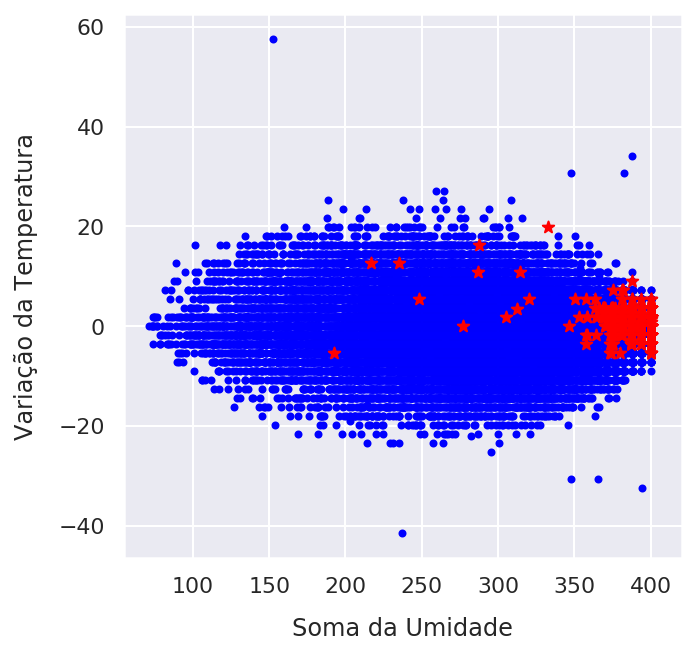

In [12]:
plt.xlabel('Soma da Umidade')
plt.ylabel('Variação da Temperatura')
plt.scatter(claro.somarelh,claro.vartmpf,color='blue',marker='.')
plt.scatter(nev.somarelh,nev.vartmpf,color='red',marker='*')

#### Média da direção do vento X Variação de Delta

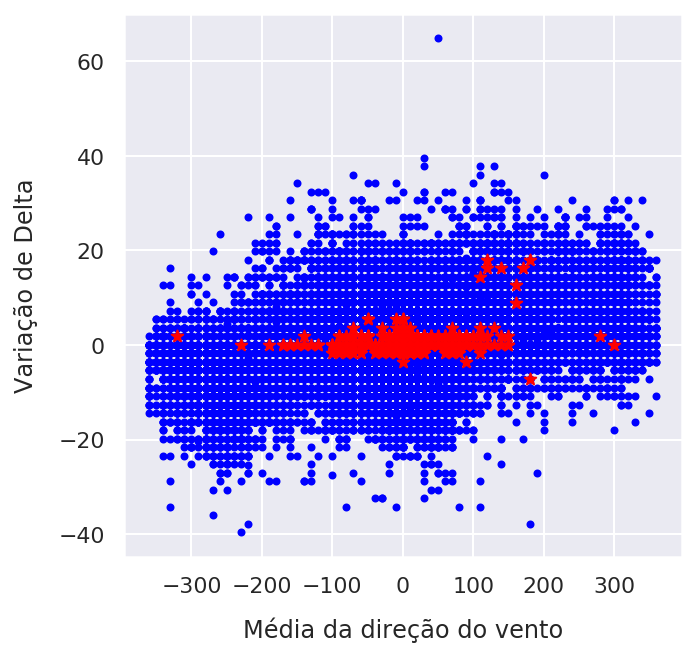

In [15]:
plt.xlabel('Média da direção do vento')
plt.ylabel('Variação de Delta')
plt.scatter(claro.vardrct,claro.vardelta,color='blue',marker='.')
plt.scatter(nev.vardrct,nev.vardelta,color='red',marker='*')

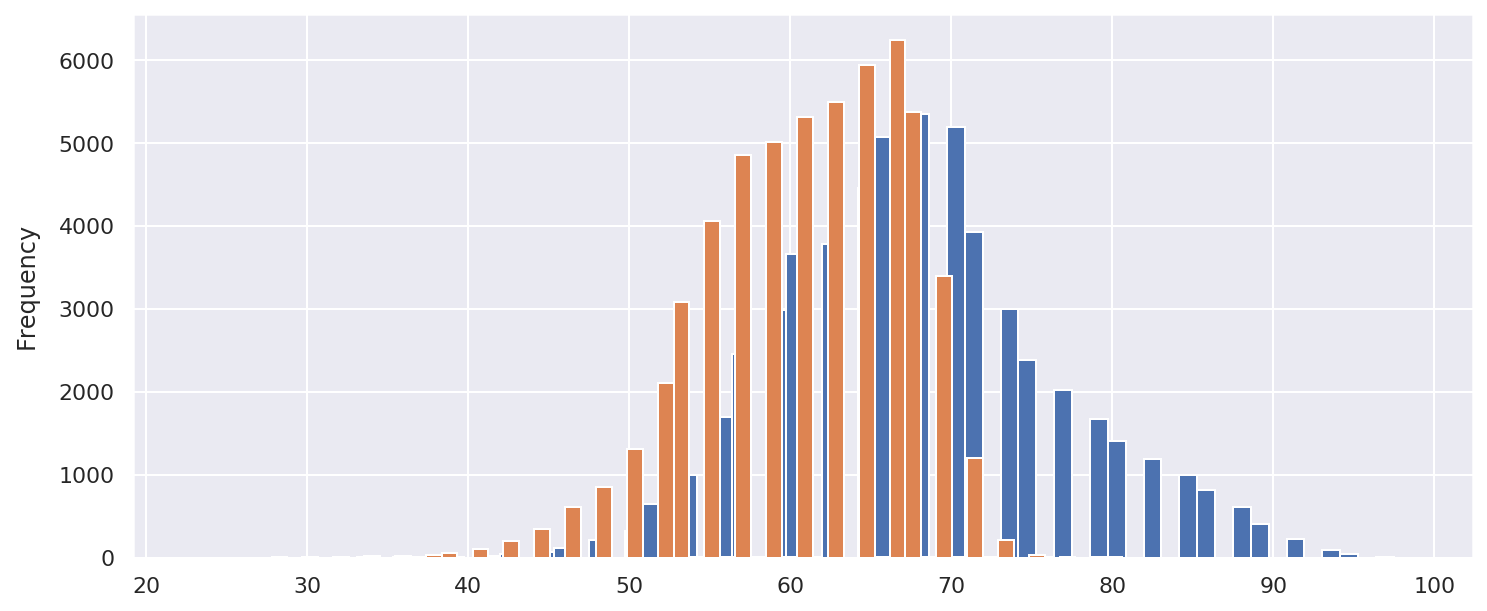

In [14]:
# bins = number of bar in figure
df.tmpf.plot(kind = 'hist',bins = 60,figsize = (12,5))
df.dwpf.plot(kind = 'hist',bins = 60,figsize = (12,5))
#df.eco.plot(kind = 'hist',bins = 60,figsize = (12,6))

(array([  4.,   1.,   2.,  18.,  14.,  83., 135., 123., 124.,  49.,  77.,
         17.]),
 array([35.6 , 38.45, 41.3 , 44.15, 47.  , 49.85, 52.7 , 55.55, 58.4 ,
        61.25, 64.1 , 66.95, 69.8 ]),
 <a list of 12 Patch objects>)

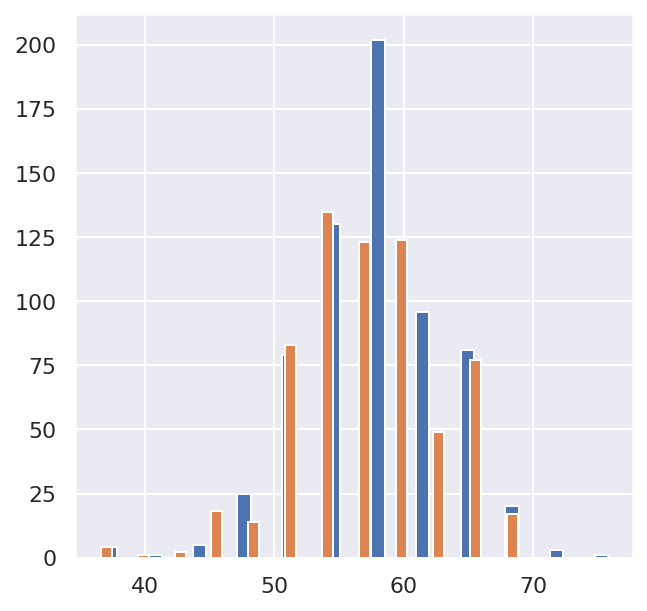

In [55]:
plt.hist(nev.tmpf,rwidth=0.3,bins=12) #tmpf = temperatura do ar
plt.hist(nev.dwpf,rwidth=0.3,bins=12) #dwpf = ponto de orvalho

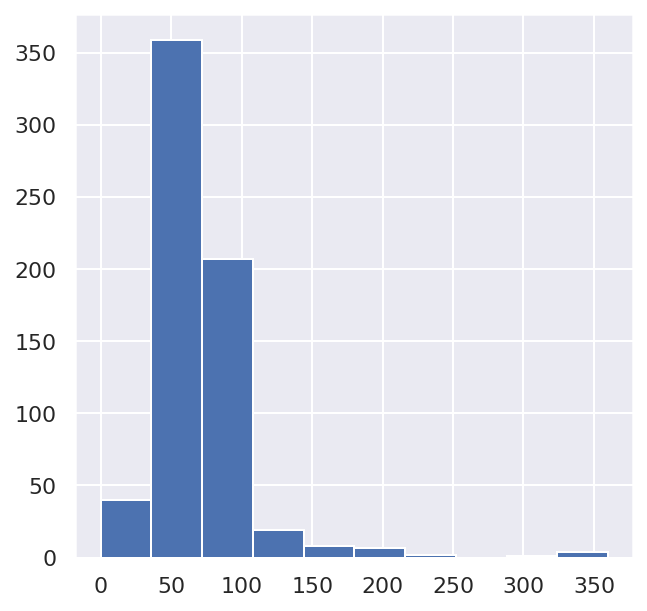

In [56]:
from pandas import Series
from matplotlib import pyplot
nev.drct.hist()
pyplot.show()

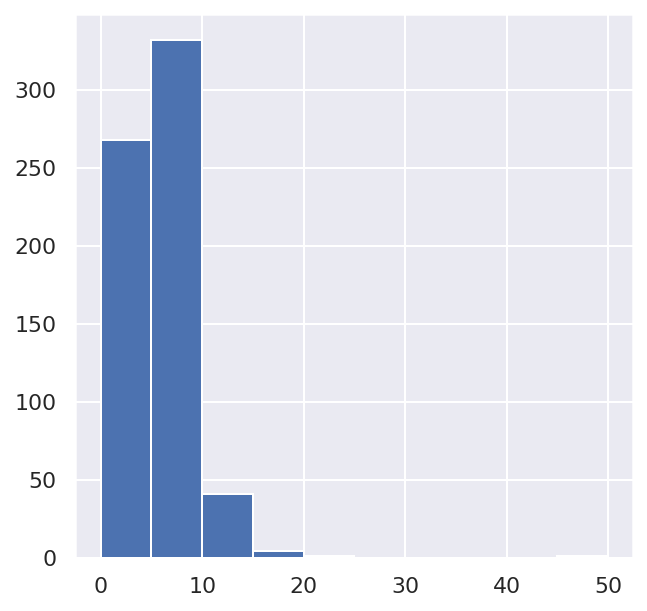

In [57]:
from pandas import Series
from matplotlib import pyplot
nev.sknt.hist()
pyplot.show()

In [58]:
# Impportando biliotecas
%matplotlib inline
import numpy as np
import pandas as pd
import numpy.random as np
import sys
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.random import rand

sns.set(style='whitegrid', palette='pastel') 

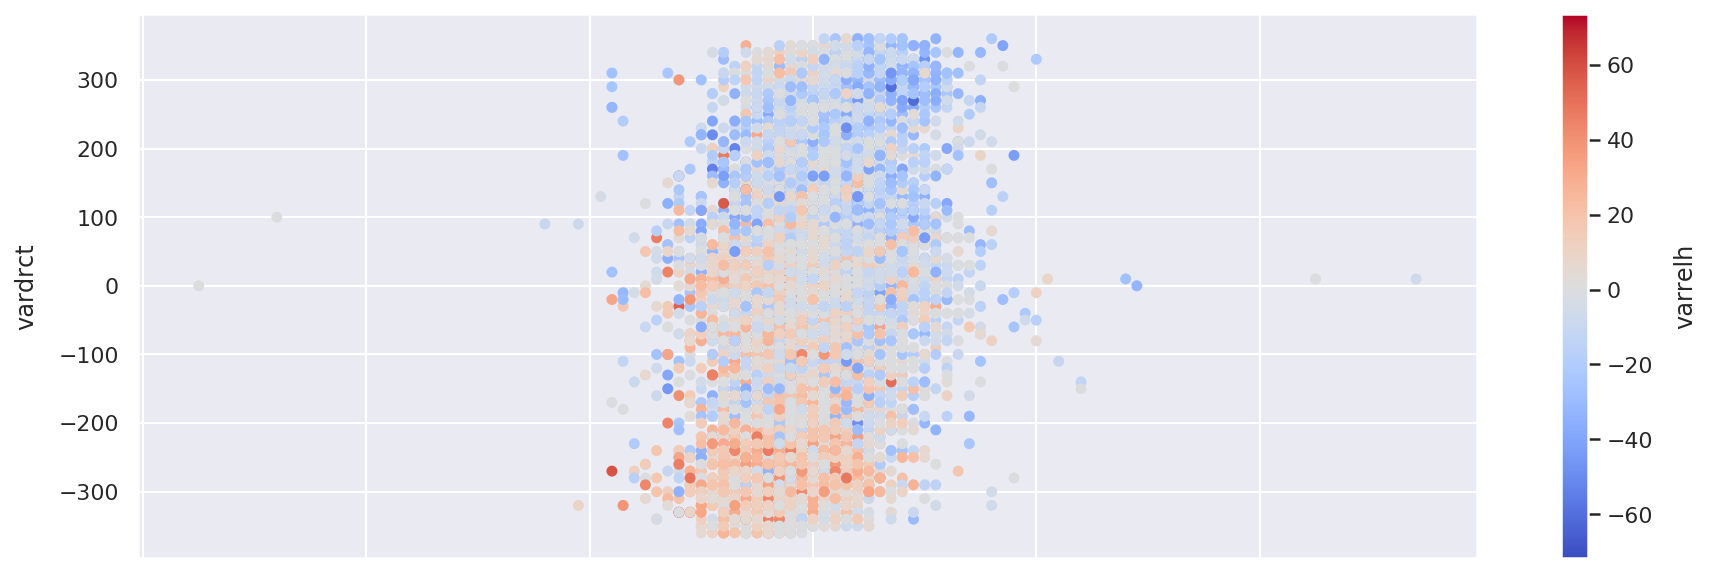

In [27]:
df.plot.scatter(x='varsknt',y='vardrct',c='varrelh',cmap='coolwarm',figsize=(15,5))

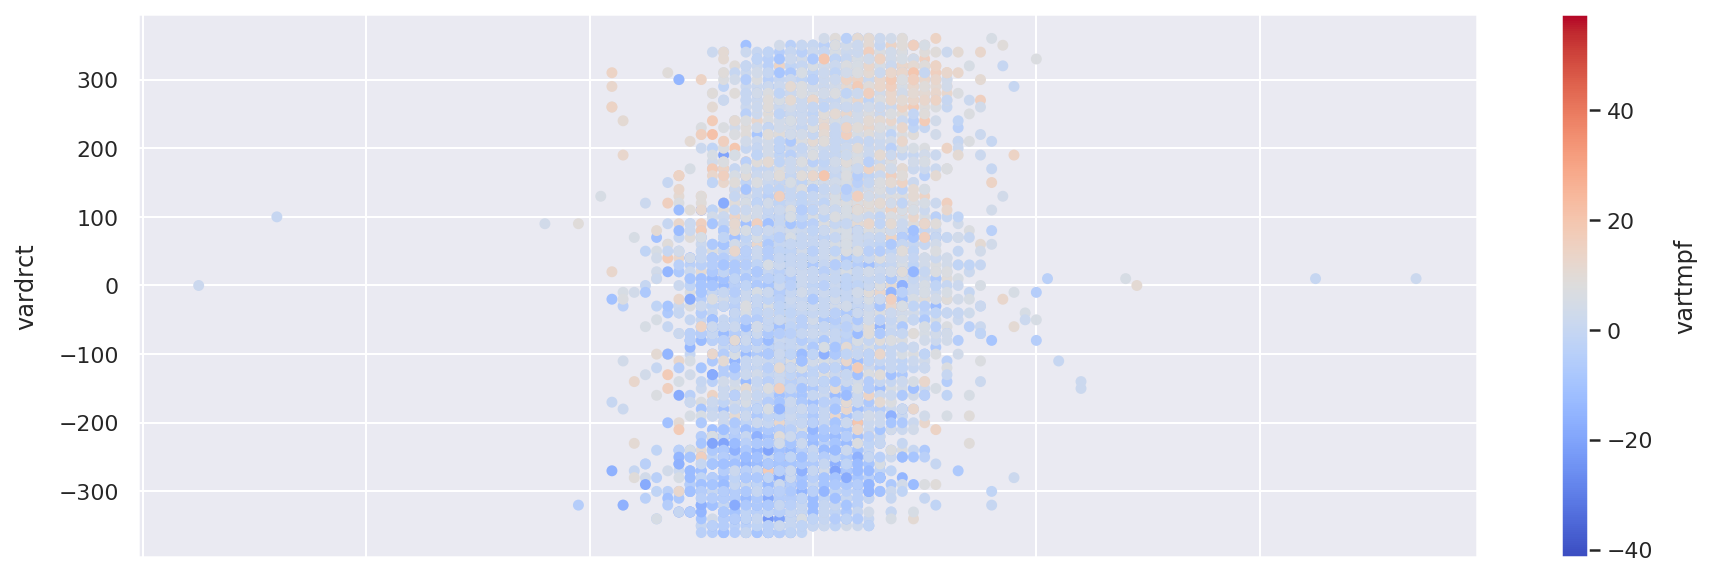

In [31]:
df.plot.scatter(x='varsknt',y='vardrct',c='vartmpf',cmap='coolwarm',figsize=(15,5))